# Homework 3: Hypothesis Testing
## CMSC320 Fall 2023
### [Peter Yan]

#### Introduction
This homework will help you practice a variety of cases where hypothesis testing is needed. Refer to the variable description below when completing this assignment to help determine the best possible hypothesis test. Before performing hypothesis tests, you should investigate variables and their distributions in the dataset. For hypothesis testing, write out the null and alternate hpyothesis, use numpy/scipy to perform calculations, and detail a short conclusion. Please try to use markdown for any written analysis!

[NumPy Stats Documentation](https://numpy.org/doc/stable/reference/routines.statistics.html) (Basic Statistics)

[SciPy Stats Documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) (Hypothesis Testing)

Read Up On and Use ONLY these tests for this homework.
- Chi-Squared Test For Independence
- Z test
- T Test
- Mann-Whitney U Test

#### Dataset

| Variable          |Definition | Key |
| :---------------- | :------: | ----: |
| survival          |   Surivival   | 0 = No, 1 = Yes |
| pclass           |    Ticket class   | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex    |  Sex   | 19.99 |
| age |  Age in years   | 42.99 |
| sibsp |  # of siblings / spouses aboard the Titanic   | 42.99 |
| parch    |  # of parents / children aboard the Titanic   | 19.99 |
| ticket    |  Ticket   | 19.99 |
| fare    |  Passenger Fare   | 19.99 |
| cabin    |  Cabin Number   | 19.99 |
| embarked    |  Port of Embarkation   | C = Cherbourg, Q = Queenstown, S = Southampton |

#### Variable Notes
pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

## Part 1: Cleaning and Exploration of Data
This part is not graded. Clean and explore data as you see fit.

In [2]:
import pandas as pd
import numpy as np
import scipy as sp

In [4]:
data = pd.read_csv("/content/drive/MyDrive/data.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Part 2: Guided Research

1. Determine data type (numerical, catagorical, etc) and qualifying conditions for the following hypothesis tests. These will be the hypothesis tests that you will use to complete the rest of the homework.
    - Chi-Squared Test For Independence
    - Z test
    - T Test
    - Mann-Whitney U Test

Answer Here

Chi-Squared Test For Independence: Categorical. Two sets of categorical variables.

Z test: Numerical. Large sample size (n > 30) and know population standard deviation. Data is normally distributed.

T Test: Numerical. Small sample size (n < 30 ) and don't know population standard deviation

Mann-Whitney U Test: Numerical. Two samples of data from two independent groups. Data is not normally distributed.

## Part 3: Hypothesis Testing with Two Catagorical Variables
Use $\alpha = 0.01$ for all statistical tests. Essentially, this is the treshold that you compare to the calculated p-value in order to determine statistical significance.

### A. Surviving and Sex (Partial Example)
Notice some of the work is already done for you to get you started.

#### 1. Create Contingency Table
|           | Male | Female |
| :--------: | :--------: | :--------: |
| Survived          |   81   | 233 |
| Did not Survive   |    468  | 109 |

Example code to create contigency table below

In [5]:
# Code to create contigency table is provided below

pd.crosstab(data["Sex"], data["Survived"].apply(lambda x: "Not Survived" if x == 0 else "Survived"))

Survived,Not Survived,Survived
Sex,,
female,81,233
male,468,109


#### 2. Create Null and Alternate Hypothesis (Already done as example for this question)

$N_0 = $ Sex and Survival are independent variables

$N_A = $ There's a significant association between sex and survival

#### 3. Perform Appropriate Hypothesis Test and Calculate P-Value
Use Numpy and Scipy, Do NOT manually do calculations

In [6]:
sp.stats.chi2_contingency(pd.crosstab(data["Sex"], data["Survived"].apply(lambda x: "Not Survived" if x == 0 else "Survived")), correction=True, lambda_=None)

Chi2ContingencyResult(statistic=260.71702016732104, pvalue=1.1973570627755645e-58, dof=1, expected_freq=array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]]))

#### 4. Interpret Results
Be specific. Determine whether to reject or accept the Null Hypothesis. Was there a group in particular that was more likely to survive the Titanic?

The p-value is: 1.1973e-58. Since p-value <= 0.01 (a), reject the null hypothesis. There is a significant association between sex and survival. In particular, women were more likely to survive than men.

### B. Surviving and Ticket Class
#### 1. Create Contingency Table

In [7]:
pd.crosstab(data["Pclass"], data["Survived"].apply(lambda x: "Not Survived" if x == 0 else "Survived"))

Survived,Not Survived,Survived
Pclass,,
1,80,136
2,97,87
3,372,119


#### 2. Create Null and Alternate Hypothesis

𝑁0=  Ticket Class and Survival are independent variables

𝑁𝐴=  There's a significant association between ticket class and survival

#### 3. Perform Appropriate Hypothesis Test and Calculate P-Value

In [8]:
sp.stats.chi2_contingency(pd.crosstab(data["Pclass"], data["Survived"].apply(lambda x: "Not Survived" if x == 0 else "Survived")), correction=True, lambda_=None)

Chi2ContingencyResult(statistic=102.88898875696056, pvalue=4.549251711298793e-23, dof=2, expected_freq=array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]]))

#### 4. Interpret Results

The p-value is: 4.5493e-23. Since p-value <= 0.01 (a), reject the null hypothesis. There is a significant association between ticket class and survival. In particular, people who had higher ticket classes were more likely to survive than those who had lower ticket classes.

### C. Surviving and Embarked Location
#### 1. Create Contingency Table

In [9]:
pd.crosstab(data["Embarked"], data["Survived"].apply(lambda x: "Not Survived" if x == 0 else "Survived"))

Survived,Not Survived,Survived
Embarked,,
C,75,93
Q,47,30
S,427,217


#### 2. Create Null and Alternate Hypothesis

𝑁0= Embarked Location and Survival are independent variables

𝑁𝐴= There's a significant association between embarked location and survival

#### 3. Perform Appropriate Hypothesis Test and Calculate P-Value

In [10]:
sp.stats.chi2_contingency(pd.crosstab(data["Embarked"], data["Survived"].apply(lambda x: "Not Survived" if x == 0 else "Survived")), correction=True, lambda_=None)

Chi2ContingencyResult(statistic=26.48914983923762, pvalue=1.769922284120912e-06, dof=2, expected_freq=array([[103.7480315,  64.2519685],
       [ 47.5511811,  29.4488189],
       [397.7007874, 246.2992126]]))

#### 4. Interpret Results

The p-value is: 1.7699e-06. Since p-value <= 0.01 (a), reject the null hypothesis. There is a significant association between embarked location and survival. In particular, those who embarked from Cherbourg were more likely to survive than passengers who embarked from other locations.

## Part 4: Hypothesis Testing with Numeric Variables

### A. Surviving and Age (Partial Example)
#### 1. Understand the distribution of the two populations (Normal or Not Normal)

The distributions are plotted for you below in this partial example. As shown by the graphs below, distribution of age for both groups (survived and not survived) is found to be approximately normal.

Hint: Notice that there are missing values for age and you will have to handle this before performing hypothesis tests!

Text(0.5, 1.0, 'Histogram of Age of People who Survived')

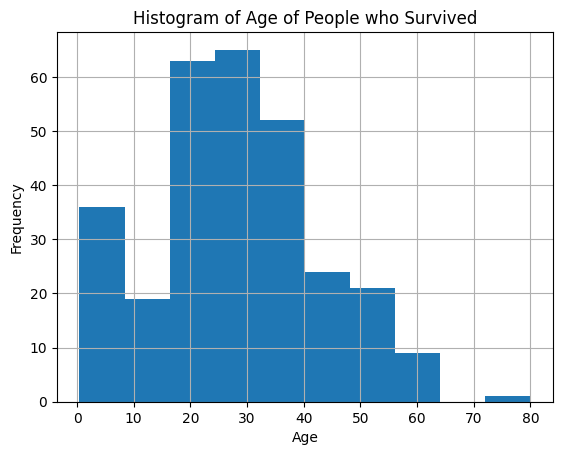

In [11]:
survived = data.loc[data["Survived"] == 1]
no_survived = data.loc[data["Survived"] == 0]
ax = survived["Age"].hist()
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Age of People who Survived")

Text(0.5, 1.0, 'Histogram of Age of People who did not Survived')

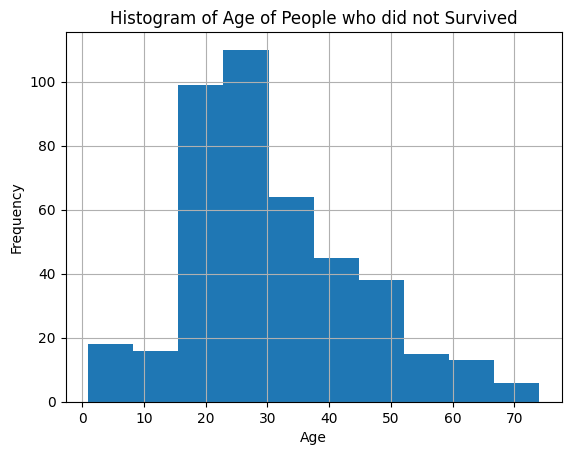

In [12]:
ax = no_survived["Age"].hist()
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Age of People who did not Survived")

#### 2. Create Null and Alternate Hypothesis

𝑁0=  Age and Survival are independent variables

𝑁𝐴=  There's a significant association between age and survival

#### 3. Perform Appropriate Hypothesis Test and Calculate P-Value (Use the fact that the distribution is approximately normal to select your hypothesis test)

In [20]:
#Use Z-test since distribution is normal and sample size is larger than 30

sp.stats.ttest_ind(data["Age"], data["Survived"], nan_policy='omit')

TtestResult(statistic=60.20071404527346, pvalue=0.0, df=1603.0)

#### 4. Interpret Results

The p-value is: 0.0. Since p-value <= 0.01 (a), reject the null hypothesis. There is a significant association between age and survival. In particular, passengers between ages 16 to 40 were more likely to survive than younger or older passengers.

### B. Surviving and Fare
#### 1. Understand the distribution of the two populations (Normal or Not Normal)
Plot the distributions like in previous question. Use plots to determine normality.

Text(0.5, 1.0, 'Histogram of Fare of People who Survived')

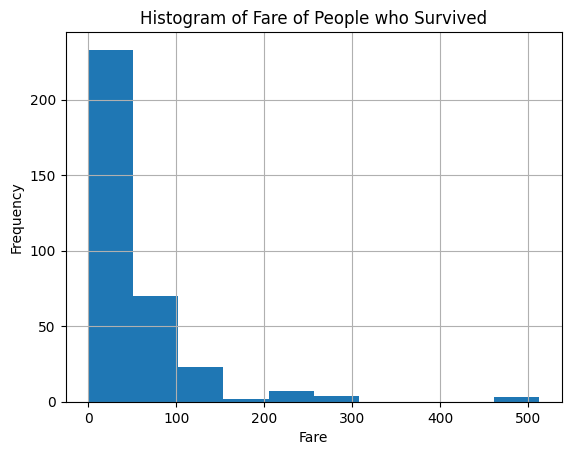

In [ ]:
survived = data.loc[data["Survived"] == 1]
no_survived = data.loc[data["Survived"] == 0]
ax = survived["Fare"].hist()
ax.set_xlabel("Fare")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Fare of People who Survived")

Text(0.5, 1.0, 'Histogram of Fare of People who did not Survived')

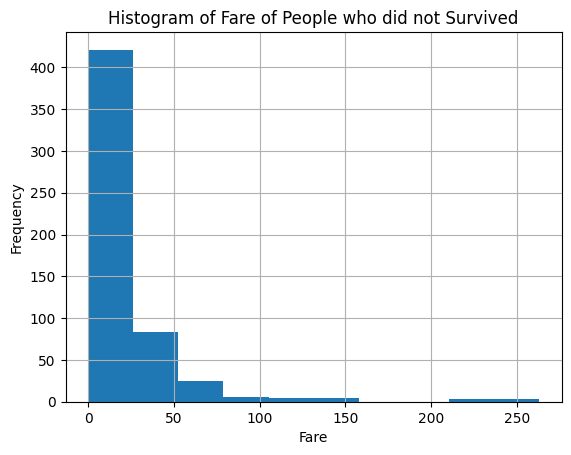

In [ ]:
ax = no_survived["Fare"].hist()
ax.set_xlabel("Fare")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Fare of People who did not Survived")

#### 2. Create Null and Alternate Hypothesis

𝑁0=  Fare and Survival are independent variables

𝑁𝐴=  There's a significant association between fare and survival

#### 3. Perform Appropriate Hypothesis Test and Calculate P-Value (Use characteristics from distribution)

In [ ]:
# Use Mann-Whitney Test since distribution of fare is not normal and there are two samples

sp.stats.mannwhitneyu(data["Fare"], data["Survived"])

MannwhitneyuResult(statistic=784633.5, pvalue=2.921805775445341e-290)

#### 4. Interpret Results

The p-value is: 2.9218e-290. Since p-value <= 0.01 (a), reject the null hypothesis. There's a significant association between fare and survival. People who paid between $0 to $100 in fare are more likely to survive than those who paid more.